In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

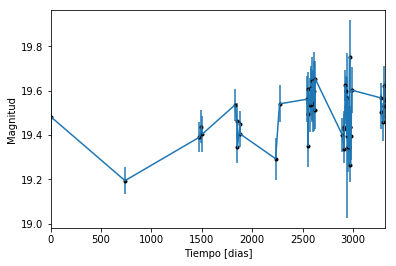

In [2]:
data = np.genfromtxt('LC_22275_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

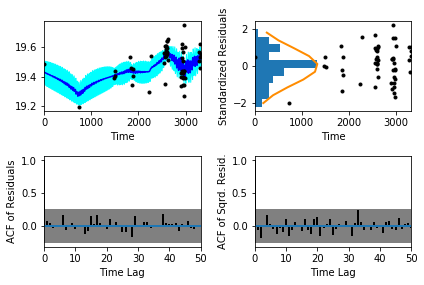

In [5]:
sample.assess_fit()

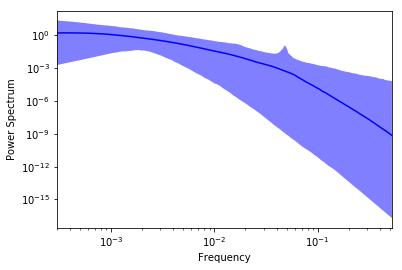

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.827215,'Medida del nivel de ruido')

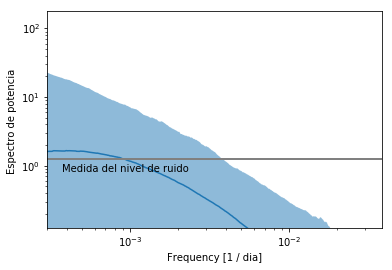

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

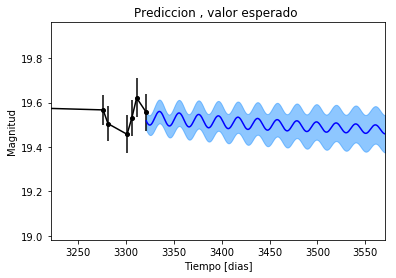

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

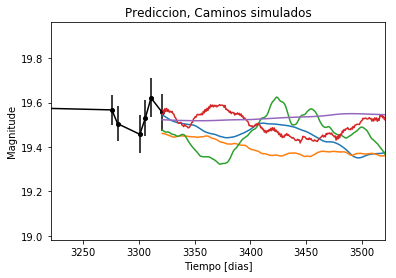

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


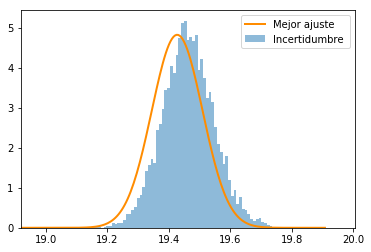

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

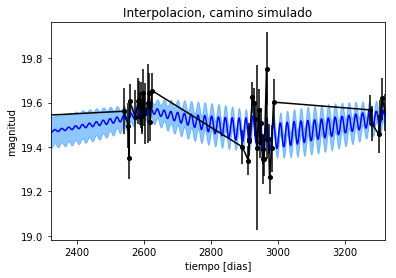

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

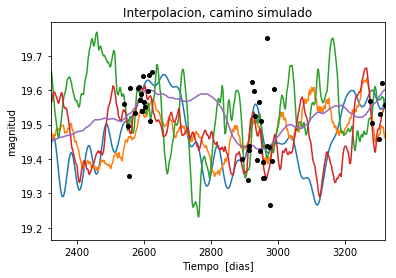

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 847.054576234
Median: 0.0134315279981
Standard deviation: 0.207568557878
68% credibility interval: [ 0.00102868  0.20237582]
95% credibility interval: [  3.37504284e-04   8.31216833e-01]
99% credibility interval: [  3.09863178e-04   9.96306259e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 626.064568576
Median: 0.00356173650297
Standard deviation: 0.101457467686
68% credibility interval: [ 0.00057291  0.03727598]
95% credibility interval: [  3.26310187e-04   3.34634236e-01]
99% credibility interval: [  3.08538976e-04   7.98510616e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 491.558918941
Median: 0.0374088418403


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 394.795196784
Median: 73.2905503753
Standard deviation: 1.76285210731
68% credibility interval: [ 71.52909183  74.60180717]
95% credibility interval: [ 69.13551009  76.86603027]
99% credibility interval: [ 67.14650789  77.49243686]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 391.744638254
Median: 0.909764767521
Standard deviation: 2.38268003535
68% credibility interval: [ 0.11441412  4.31510257]
95% credibility interval: [ 0.02061016  8.40832329]
99% credibility interval: [  1.09701262e-02   1.13829937e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 351.060005537
Median: 0.573435786223
Standard deviation: 10.0969825253
68% credibility interval: [  0.03795476  11.02398466]
95% credibility interval: [  2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 7369.5710246
Median: 5.14474066762e-24
Standard deviation: 6.69663502381e+151
68% credibility interval: [  6.83837265e-74   2.07912681e+53]
95% credibility interval: [  1.48049866e-124   1.24542624e+144]
99% credibility interval: [  6.67545097e-153   1.22735393e+152]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3216.29263382
Median: 19.4545171409
Standard deviation: 0.0493705705166
68% credibility interval: [ 19.40788733  19.49044204]
95% credibility interval: [ 19.340577    19.53664891]
99% credibility interval: [ 19.27509603  19.58899658]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1014.91223576
Median: 0.0235804952853
Standard deviation: 0.253757087986
68% credibility interval: [ 0.          0.37836267]
95% credibility interval: [ 0.         0.9074434]
99% credibility interval: [ 0.          1.00990893]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1014.91223576
Median: 0.0235804952853
Standard deviation: 0.253757087986
68% credibility interval: [ 0.          0.37836267]
95% credibility interval: [ 0.         0.9074434]
99% credibility interval: [ 0.          1.00990893]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1047.06894602
Median: 0.0
Standard deviation: 0.014225198993
68% credibili

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 394.795196784
Median: 73.2905503753
Standard deviation: 1.76285210731
68% credibility interval: [ 71.52909183  74.60180717]
95% credibility interval: [ 69.13551009  76.86603027]
99% credibility interval: [ 67.14650789  77.49243686]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1484.73800978
Median: 0.0110636858234
Standard deviation: 0.0124336976771
68% credibility interval: [ 0.00619294  0.02130663]
95% credibility interval: [ 0.00344038  0.04632427]
99% credibility interval: [ 0.00223032  0.08028346]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1027.86801038
Median: 0.966934595671
Standard deviation: 0.166381627505
68% credibility interval: [ 0.82677349  1.14962865]
95% credibility interval: [ 0.71476895  1.35816144]
99% credibility interval: [ 0.649112   1.5275446]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 828.502613076
Median: 9.44552562187e-05
Standard deviation: 0.211797469649
68% credibility interval: [  1.75306031e-56   1.83839905e-02]
95% credibility interval: [  3.29003623e-147   3.23148243e-001]
99% credibility interval: [  4.55184559e-155   1.49092599e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 847.054576234
Median: (-0.0843927793705-0.264655283326j)
Standard deviation: 2.05986318355
68% credibility interval: [-1.27156481-2.32536731j -0.00646337-6.31897931j]
95% credibility interval: [ -5.22268939e+00+0.j          -2.12060196e-03-0.31311623j]
99% credibility interval: [ -6.25997685e+00+0.j          -1.94692777e-03-0.00494174j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 626.064568576
Median: (-0.0223790504635+0j)
Standard deviation: 1.71711853132
68% credibility interval: [-0.23421190+0.04015996j -0.00359972+0.83174232j]
95% credibility interval: [ -2.10256891e+00+1.73746809j  -2.05026737e-03+0.0096071j ]
99% credibility interval: [ -5.01719017e+00+5.07219406j  -1.93860756e-03+0.j        ]
Posterior summa